In [ ]:
# Persiapkan Package yang akan digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from numpy import concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### **Mempersiapkan data**

In [ ]:
# Membuka dan membaca file data tangkapan ikan
data_tangkapan = pd.read_csv('/content/drive/MyDrive/Tugas Akhir/Data/Data DPI 2018/Hasil tangkapan dan variabel lingkungan/Hasil tangkapan & variabel lingkungan.csv')

# Mengatur kolom 'datetime' sebagai index
data_tangkapan.set_index('datetime', inplace=True)

# DROP kolom/fitur yang tidak akan dipakai (jenis ikan lainnya, musim penangkapan ikan, arah angin, dan arah arus)
data_tangkapan.drop(data_tangkapan.columns[[0, 2, 3, 4, 5, 12, 14, 16]], axis=1, inplace=True)

data_tangkapan

,Maesang (Cakalang),sst_dailymean (C),chlorofil_dailymean (mg/m^3),eastward_seawater_dailymean (m/s),northward_seawater_dailymean (m/s),eastward_wind_dailymean (m/s),northward_wind_dailymean (m/s),wind_magnitude_dailymean (m/s),seawater_magnitude_dailymean (m/s)
datetime,,,,,,,,,
1/4/2018,1320,29.312853,0.191309,0.028687,-0.075512,-4.557285,-2.767206,5.331630,0.080777
1/5/2018,4060,29.329287,0.171732,-0.056634,0.013123,-6.044079,-1.501644,6.227827,0.058134
1/6/2018,9700,29.266427,0.164844,-0.078302,0.149933,-6.126054,1.050582,6.215485,0.169148
1/7/2018,10710,29.185710,0.187319,-0.021494,0.245761,-5.290941,-1.605702,5.529225,0.246699
1/8/2018,8180,29.364286,0.183835,0.075337,0.207439,-3.340755,-3.694750,4.981147,0.220695
...,...,...,...,...,...,...,...,...,...
12/6/2022,8416,29.763572,0.114430,0.036301,0.143942,-1.114353,-0.592131,1.261904,0.148448
12/7/2022,11952,29.701425,0.114216,0.118403,0.126254,1.757081,-0.350543,1.791707,0.173088
12/8/2022,15055,29.657859,0.117090,0.262125,0.118507,5.320812,0.102421,5.321797,0.287669


### **Melakukan normalisasi pada data dengan MinMaxScaler()**

In [ ]:
# Scaler untuk normalisasi data
scaler = MinMaxScaler()
data_tangkapan = scaler.fit_transform(data_tangkapan)

In [ ]:
# Mengecek apakah data sudah ternormalisasi
data_tangkapan = pd.DataFrame(data_tangkapan)
data_tangkapan

,0,1,2,3,4,5,6,7,8
0,0.021293,0.543922,0.483700,0.414718,0.486165,0.171999,0.261302,0.567374,0.078348
1,0.065492,0.548827,0.406264,0.354295,0.566367,0.082848,0.344175,0.665069,0.053141
2,0.156472,0.530063,0.379020,0.338950,0.690160,0.077932,0.511305,0.663723,0.176726
3,0.172764,0.505969,0.467920,0.379181,0.776871,0.128008,0.337361,0.588914,0.263060
4,0.131953,0.559275,0.454139,0.447755,0.742195,0.244945,0.200563,0.529168,0.234111
...,...,...,...,...,...,...,...,...,...
1765,0.135759,0.678465,0.179607,0.420110,0.684739,0.378445,0.403734,0.123731,0.153683
1766,0.192799,0.659913,0.178761,0.478254,0.668734,0.550623,0.419554,0.181485,0.181112
1767,0.242854,0.646909,0.190130,0.580036,0.661724,0.764313,0.449216,0.566302,0.308669
1768,0.261808,0.656076,0.126617,0.662519,0.570313,0.733407,0.511261,0.522365,0.410342


### **Menentukan fitur prediktor dan target**

In [ ]:
# Semua kolom selain kolom pertama sebagai prediktor
predictor = data_tangkapan.iloc[:, 1:]

# Kolom pertama sebagai target (hasil tangkapan ikan Cakalang)
target = data_tangkapan.iloc[:, 0]

### **Membagi data untuk training & testing**

In [ ]:
# Jumlah data untuk training
n_train = 708 # 40% atau 2 tahun dari 5 tahun

# Membagi data kedalam training & testing
predictor_train, target_train = predictor[:n_train], target[:n_train]
predictor_test, target_test = predictor[n_train:], target[n_train:]

### **Melatih model & melakukan prediksi ke data test**

In [ ]:
# Melatih model regresi linear dengan data training
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(predictor_train, target_train)

LinearRegression()

In [ ]:
# Melakukan prediksi pada data testing
target_predict = lin_reg.predict(predictor_test)

In [ ]:
# Reshape fitur target pada data sebenarnya dan hasil prediksi agar dapat dilakukan digabungkan dan dilakukan inverse scalling
target_predict = target_predict.reshape(-1,1)

target_test = np.array(target_test)
target_test = target_test.reshape(-1,1)

In [ ]:
# invert scaling untuk hasil prediksi
inv_predict_target = concatenate((target_predict, predictor_test), axis=1)
inv_predict_target = scaler.inverse_transform(inv_predict_target)
inv_predict_target = inv_predict_target[:,0]

# invert scaling data test sebenarnya
inv_actual_target = concatenate((target_test, predictor_test), axis=1)
inv_actual_target = scaler.inverse_transform(inv_actual_target)
inv_actual_target = inv_actual_target[:,0]

In [ ]:
# Menampilkan nilai TARGET sebenarnya dan nilai TARGET hasil prediksi
data_tangkapan_best_predict = pd.DataFrame({'Actual': inv_actual_target, 'Predicted' : inv_predict_target})
data_tangkapan_best_predict.head(15)

,Actual,Predicted
0,3510.0,11204.217398
1,7427.0,11246.799145
2,3750.0,11298.242108
3,0.0,7139.741194
4,0.0,12113.286504
5,1560.0,10878.419955
6,60.0,11050.816404
7,1580.0,10455.611221
8,3180.0,11575.664257
9,8910.0,10761.285139


### **Menampilkan nilai TARGET sebenarnya dan nilai TARGET hasil prediksi dalam bentuk grafik**

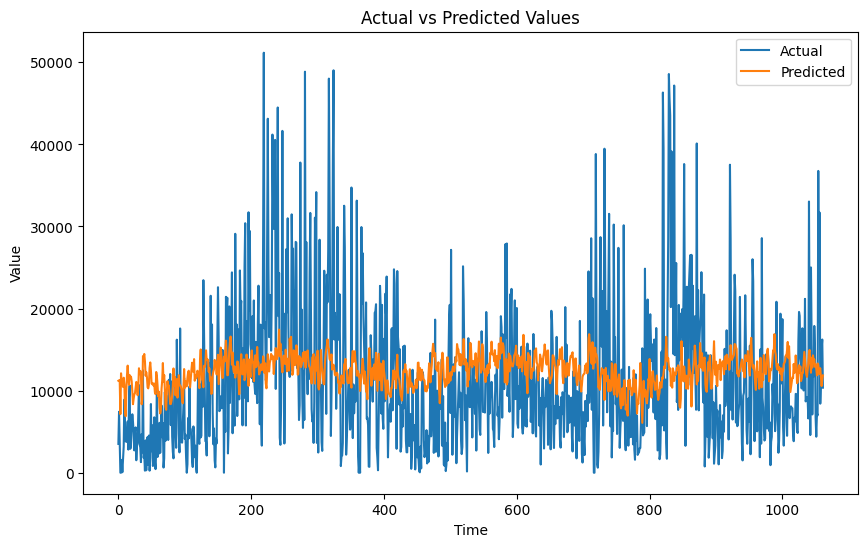

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(inv_actual_target, label='Actual')
plt.plot(inv_predict_target, label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.show()

### **Evaluasi Model Regresi Linear**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Coefficient of Determination (R-squared score): ", r2_score(inv_actual_target, inv_predict_target))
print("Mean Absolute Error : ", mean_absolute_error(inv_actual_target, inv_predict_target))
print("Mean Squared Error : ", mean_squared_error(inv_actual_target, inv_predict_target))
print("Root Mean Squared Error : ", np.sqrt(mean_squared_error(inv_actual_target, inv_predict_target)))

Coefficient of Determination (R-squared score):  -0.004889933521344592
Mean Absolute Error :  6805.790992882025
Mean Squared Error :  76330724.0946599
Root Mean Squared Error :  8736.745623781197


### **Menyimpan Model & Scaler dalam Format Pickle**

In [ ]:
# Save the Linear Regression model with Pickle
pickle.dump(lin_reg, open("LinReg model.pkl", "wb"))

In [ ]:
# Save the scaler to do inverse transform later
pickle.dump(scaler, open("scaler.pkl", "wb"))

# Save the scaler to do inverse transform later
joblib.dump(scaler, "scaler.joblib")